In [180]:
# https://zhuanlan.zhihu.com/p/559411557
import pandas as pd
 
columns = ["training",   # Treatment assignment indicator
           "age",        # Age of participant
           "education",  # Years of education
           "black",      # Indicate whether individual is black
           "hispanic",   # Indicate whether individual is hispanic
           "married",    # Indicate whether individual is married
           "no_degree",  # Indicate if individual has no high-school diploma
           "re74",       # Real earnings in 1974, prior to study participation
           "re75",       # Real earnings in 1975, prior to study participation
           "re78"]       # Real earnings in 1978, after study end
 
treated = pd.read_csv("nswre74_treated.txt", 
                      delim_whitespace=True, header=None, names=columns)
control = pd.read_csv("nswre74_control.txt",
                      delim_whitespace=True, header=None, names=columns)
lalonde = pd.concat([treated, control], ignore_index=True)
lalonde = lalonde.sample(frac=1.0, random_state=42)  # Shuffle
 
print(lalonde.shape)
lalonde.head()
(445, 10)

(445, 10)


(445, 10)

In [181]:
lalonde = lalonde.join((lalonde[["re74", "re75"]] == 0).astype(int), rsuffix=("=0"))
lalonde.reset_index(inplace=True)
lalonde.head()

,index,training,age,education,black,hispanic,married,no_degree,re74,re75,re78,re74=0,re75=0
0,284,0.0,28.0,12.0,1.0,0.0,1.0,0.0,0.000,0.0000,0.0000,1,1
1,358,0.0,19.0,11.0,1.0,0.0,0.0,1.0,1626.623,0.0000,0.0000,0,1
2,117,1.0,20.0,12.0,1.0,0.0,0.0,0.0,0.000,377.5686,1652.6370,1,0
3,412,0.0,25.0,11.0,1.0,0.0,0.0,1.0,15209.990,3072.7260,284.6584,0,0
4,70,1.0,27.0,9.0,1.0,0.0,0.0,1.0,0.000,0.0000,0.0000,1,1


In [182]:
# lalonde = pd.get_dummies(lalonde, columns=["education"], drop_first=True)
print(lalonde.shape)
lalonde.head()


(445, 13)


,index,training,age,education,black,hispanic,married,no_degree,re74,re75,re78,re74=0,re75=0
0,284,0.0,28.0,12.0,1.0,0.0,1.0,0.0,0.000,0.0000,0.0000,1,1
1,358,0.0,19.0,11.0,1.0,0.0,0.0,1.0,1626.623,0.0000,0.0000,0,1
2,117,1.0,20.0,12.0,1.0,0.0,0.0,0.0,0.000,377.5686,1652.6370,1,0
3,412,0.0,25.0,11.0,1.0,0.0,0.0,1.0,15209.990,3072.7260,284.6584,0,0
4,70,1.0,27.0,9.0,1.0,0.0,0.0,1.0,0.000,0.0000,0.0000,1,1


In [183]:
lalonde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      445 non-null    int64  
 1   training   445 non-null    float64
 2   age        445 non-null    float64
 3   education  445 non-null    float64
 4   black      445 non-null    float64
 5   hispanic   445 non-null    float64
 6   married    445 non-null    float64
 7   no_degree  445 non-null    float64
 8   re74       445 non-null    float64
 9   re75       445 non-null    float64
 10  re78       445 non-null    float64
 11  re74=0     445 non-null    int64  
 12  re75=0     445 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 45.3 KB


In [184]:
lalonde.describe()

,index,training,age,education,black,hispanic,married,no_degree,re74,re75,re78,re74=0,re75=0
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,222.000000,0.415730,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,2102.265311,1377.138368,5300.763699,0.732584,0.649438
std,128.604691,0.493402,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5363.582400,3150.960771,6631.491695,0.443109,0.477683
min,0.000000,0.000000,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111.000000,0.000000,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,222.000000,0.000000,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,3701.812000,1.000000,1.000000
75%,333.000000,1.000000,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,824.388900,1220.836000,8124.715000,1.000000,1.000000
max,444.000000,1.000000,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,39570.680000,25142.240000,60307.930000,1.000000,1.000000


In [185]:
lalonde.groupby("training").describe()

index                                                           age  \
          count   mean        std    min     25%    50%     75%    max  count   
training                                                                        
0.0       260.0  314.5  75.199734  185.0  249.75  314.5  379.25  444.0  260.0   
1.0       185.0   92.0  53.549043    0.0   46.00   92.0  138.00  184.0  185.0   

                     ... re74=0      re75=0                                \
               mean  ...    75%  max  count      mean       std  min  25%   
training             ...                                                    
0.0       25.053846  ...    1.0  1.0  260.0  0.684615  0.465565  0.0  0.0   
1.0       25.816216  ...    1.0  1.0  185.0  0.600000  0.491227  0.0  0.0   

                         
          50%  75%  max  
training                 
0.0       1.0  1.0  1.0  
1.0       1.0  1.0  1.0  

[2 rows x 96 columns]

In [186]:
df_control = lalonde[lalonde.training==0]
df_treatment = lalonde[lalonde.training==1]

In [187]:
pip install psmpy

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.tencent.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


## 采用psmpy包实现

In [188]:
from psmpy import PsmPy
from psmpy.plotting import *

In [189]:
psm = PsmPy(lalonde, treatment='training', indx='index', exclude = [])

In [190]:
# same as my code using balance=False
psm.logistic_ps(balance=False)
psm.predicted_data

,index,age,education,black,hispanic,married,no_degree,re74,re75,re78,re74=0,re75=0,propensity_score,propensity_logit,training
0,284,28.0,12.0,1.0,0.0,1.0,0.0,0.000,0.0000,0.0000,1,1,0.490904,-0.036388,0
1,358,19.0,11.0,1.0,0.0,0.0,1.0,1626.623,0.0000,0.0000,0,1,0.312868,-0.786745,0
2,412,25.0,11.0,1.0,0.0,0.0,1.0,15209.990,3072.7260,284.6584,0,0,0.288686,-0.901773,0
3,192,34.0,11.0,1.0,0.0,1.0,1.0,0.000,0.0000,6040.3350,1,1,0.424795,-0.303121,0
4,361,25.0,11.0,1.0,0.0,0.0,1.0,5281.245,0.0000,0.0000,0,1,0.294761,-0.872372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,121,18.0,10.0,1.0,0.0,0.0,1.0,0.000,798.9079,9737.1540,1,0,0.465501,-0.138217,1
441,20,23.0,11.0,1.0,0.0,0.0,1.0,0.000,0.0000,0.0000,1,1,0.308456,-0.807349,1
442,71,46.0,13.0,1.0,0.0,0.0,0.0,0.000,0.0000,647.2046,1,1,0.504699,0.018797,1
443,106,27.0,13.0,1.0,0.0,0.0,0.0,0.000,0.0000,34099.2800,1,1,0.764929,1.179895,1


In [198]:
## replacement=True is 放回
## repacement=False is 不放回
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

/home/hessianfang/.local/lib/python3.6/site-packages/psmpy/psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


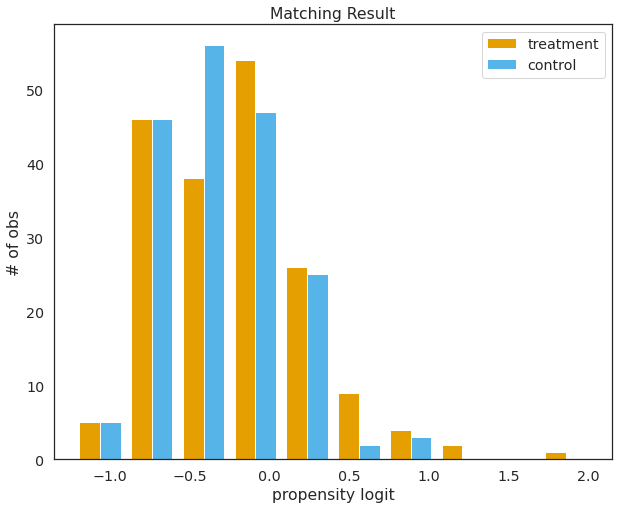

In [199]:
psm.plot_match(Title='Matching Result', Ylabel='# of obs', Xlabel= 'propensity logit', names = ['treatment', 'control'])

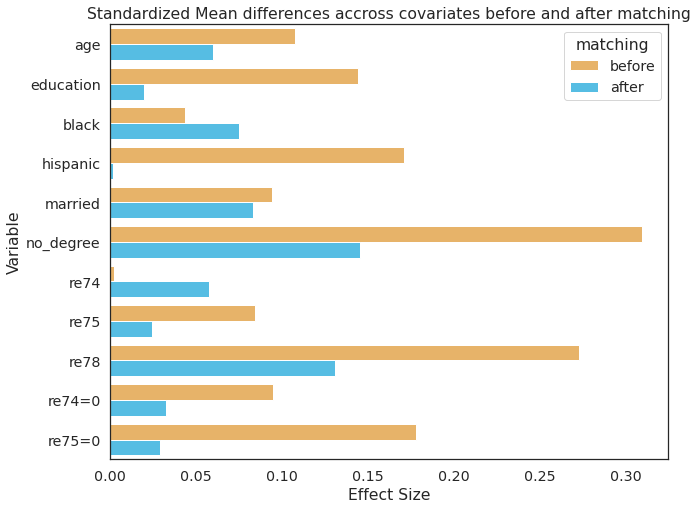

In [200]:
psm.effect_size_plot()

In [201]:
len(psm.matched_ids['matched_ID'].unique())

185

In [202]:
treatment_res = lalonde[lalonde['training']==1]['re78'].mean()

In [203]:
control_res = pd.merge(psm.matched_ids,lalonde,left_on='matched_ID',right_on='index')['re78'].mean()

In [204]:
treatment_res - control_res

943.4466845405395

## 拆解实现

In [206]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

In [207]:
# 查看数据结构
print(lalonde.head())
print("\n变量说明:")
print("treat: 是否接受培训 (1=是, 0=否)")
print("age: 年龄")
print("educ: 教育年限")
print("black: 是否黑人 (1=是)")
print("hispan: 是否西班牙裔 (1=是)")
print("married: 是否已婚 (1=是)")
print("nodegree: 是否无学位 (1=是)")
print("re74: 1974年收入")
print("re75: 1975年收入")
print("re78: 1978年收入（结果变量）")


   index  training   age  education  black  hispanic  married  no_degree  \
0    284       0.0  28.0       12.0    1.0       0.0      1.0        0.0   
1    358       0.0  19.0       11.0    1.0       0.0      0.0        1.0   
2    117       1.0  20.0       12.0    1.0       0.0      0.0        0.0   
3    412       0.0  25.0       11.0    1.0       0.0      0.0        1.0   
4     70       1.0  27.0        9.0    1.0       0.0      0.0        1.0   

        re74       re75       re78  re74=0  re75=0  
0      0.000     0.0000     0.0000       1       1  
1   1626.623     0.0000     0.0000       0       1  
2      0.000   377.5686  1652.6370       1       0  
3  15209.990  3072.7260   284.6584       0       0  
4      0.000     0.0000     0.0000       1       1  

变量说明:
treat: 是否接受培训 (1=是, 0=否)
age: 年龄
educ: 教育年限
black: 是否黑人 (1=是)
hispan: 是否西班牙裔 (1=是)
married: 是否已婚 (1=是)
nodegree: 是否无学位 (1=是)
re74: 1974年收入
re75: 1975年收入
re78: 1978年收入（结果变量）


In [210]:
X = lalonde[['age', 'education', 'black', 'hispanic', 'married', 'no_degree', 're74', 're75']]
y = lalonde['training']
outcome = lalonde['re78']

In [211]:
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X, y)
lalonde['ps'] = ps_model.predict_proba(X)[:, 1]

In [213]:
# 执行倾向得分匹配（1:1最近邻匹配）
def psm_match(data, caliper=0.2):
    treated = data[data['training'] == 1]
    control = data[data['training'] == 0]
    
    nbrs = NearestNeighbors(n_neighbors=1, metric='euclidean').fit(control[['ps']])
    distances, indices = nbrs.kneighbors(treated[['ps']])
    
    matched_control = control.iloc[indices.flatten()].copy()
    matched_control['distance'] = distances.flatten()
    
    # 应用卡钳值
    matched = matched_control[matched_control['distance'] < caliper]
    
    return pd.concat([treated, matched.drop('distance', axis=1)])

matched_data = psm_match(lalonde)


In [232]:
# 评估匹配质量
def assess_balance(original, matched):
    balance_report = pd.DataFrame()
    
    for col in ['age', 'education', 'black', 'hispanic', 'married', 'no_degree', 're74', 're75']:
        # 原始数据差异
        diff_original = original[original['training']==1][col].mean() - original[original['training']==0][col].mean()
        # 匹配后差异
        diff_matched = matched[matched['training']==1][col].mean() - matched[matched['training']==0][col].mean()
        
        # 标准化差异
        std_original = np.sqrt(0.5*(original[original['training']==1][col].var() + original[original['training']==0][col].var()))
        std_matched = np.sqrt(0.5*(matched[matched['training']==1][col].var() + matched[matched['training']==0][col].var()))
        
        balance_report.loc[col, '原始标准化差异'] = diff_original/std_original
        balance_report.loc[col, '匹配后标准化差异'] = diff_matched/std_matched
    
    return balance_report

balance = assess_balance(lalonde, matched_data)
print("\n协变量平衡性报告:")
print(abs(balance['原始标准化差异'] - balance['匹配后标准化差异']))


协变量平衡性报告:
age          0.243839
education    0.247238
black        0.222673
hispanic     0.152233
married      0.237414
no_degree    0.280138
re74         0.033917
re75         0.069312
dtype: float64


In [233]:
# 计算处理效应（ATT）
att = (matched_data[matched_data['training']==1]['re78'].mean() 
       - matched_data[matched_data['training']==0]['re78'].mean())

print(f"\n平均处理效应（ATT）: {att:.2f} 美元")


平均处理效应（ATT）: 1815.56 美元


In [234]:
# 使用T检验验证显著性, 如果 p<0.05 通常认为可以拒绝原假设，即干预导致实验组与控制组存在显著差异
from scipy import stats
t_stat, p_value = stats.ttest_ind(
    matched_data[matched_data['training']==1]['re78'],
    matched_data[matched_data['training']==0]['re78']
)
print(f"T检验结果: t={t_stat:.2f}, p={p_value:.4f}")

T检验结果: t=2.63, p=0.0090


/usr/local/tpython3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/tpython3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/tpython3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/tpython3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/tpython3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/tpython3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: 

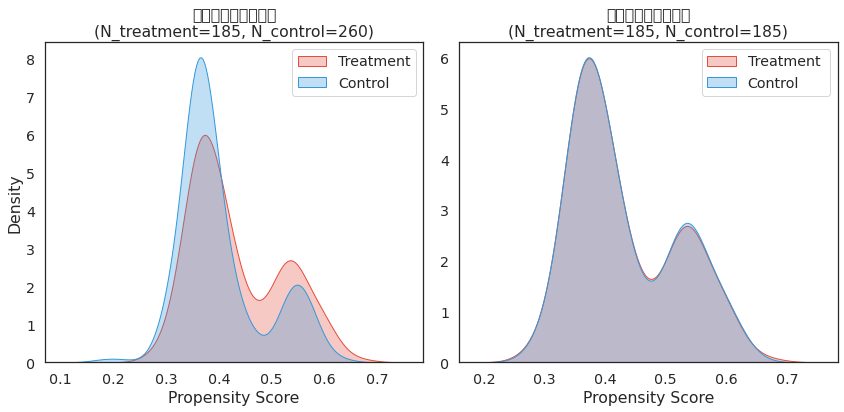

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

color='#E74C3C'  # 处理组用红色系
color='#3498DB'   # 对照组用蓝色系
alpha=0.3         # 填充透明度
fill=True         # 填充曲线下方区域



# 创建画布
plt.figure(figsize=(12, 6))

# ---------- 匹配前的分布 ----------
plt.subplot(1, 2, 1)
# 绘制处理组分布
sns.kdeplot(lalonde[lalonde['training']==1]['ps'], 
            label='Treatment', color='#E74C3C', fill=True, alpha=0.3)
# 绘制对照组分布
sns.kdeplot(lalonde[lalonde['training']==0]['ps'], 
            label='Control', color='#3498DB', fill=True, alpha=0.3)

plt.title('匹配前倾向得分分布\n(N_treatment={}, N_control={})'.format(
    sum(lalonde['training']==1), sum(lalonde['training']==0)))
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()

# ---------- 匹配后的分布 ----------
plt.subplot(1, 2, 2)
# 绘制匹配后的处理组（实际没有变化）
sns.kdeplot(matched_data[matched_data['training']==1]['ps'], 
            label='Treatment ', color='#E74C3C', fill=True, alpha=0.3)
# 绘制匹配后的对照组
sns.kdeplot(matched_data[matched_data['training']==0]['ps'], 
            label='Control', color='#3498DB', fill=True, alpha=0.3)

plt.title('匹配后倾向得分分布\n(N_treatment={}, N_control={})'.format(
    sum(matched_data['training']==1), sum(matched_data['training']==0)))
plt.xlabel('Propensity Score')
plt.ylabel('')
plt.legend()

plt.tight_layout()
plt.show()